In [1]:
import numpy as np

In [2]:
%matplotlib inline
import seaborn as sns

In [3]:
from ptsa.data.readers import BaseEventReader
from pybeh.create_data import create_data

In [4]:
er = BaseEventReader(filename='/data/events/ltpFR/LTP093_events.mat')
events = er.read()
data = create_data(events=events, trial_field = 'trial') #list

In [5]:
import pybeh.spc as spc

[<matplotlib.text.Text at 0x11533e190>, <matplotlib.text.Text at 0x113fae290>]

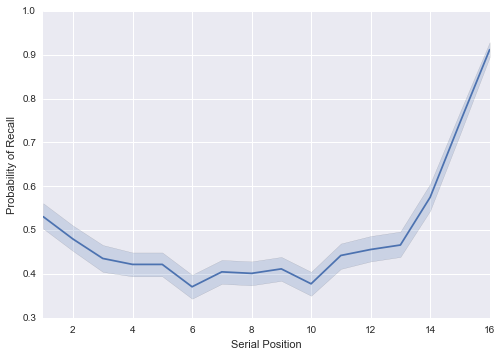

In [6]:
p_recall = spc.spc(data['recalls'],
                   np.arange(len(data['subject'])),
                   data['listLength'])
ax = sns.tsplot(data=p_recall, time = np.arange(16)+1)
ax.set(xlabel='Serial Position',ylabel='Probability of Recall')

In [7]:
import pybeh.crp as crp

In [8]:
lag_crp = crp.crp(recalls=data['recalls'],
                  subjects=np.arange(len(data['subject'])),
                  listLength=12,
                  lag_num =5 )

/Users/jkragel/miniconda2/envs/ptsa/lib/python2.7/site-packages/seaborn/algorithms.py:76: RuntimeWarning: Mean of empty slice
  boot_dist.append(func(*sample, **func_kwargs))
/Users/jkragel/miniconda2/envs/ptsa/lib/python2.7/site-packages/seaborn/timeseries.py:284: RuntimeWarning: Mean of empty slice
  central_data = estimator(df_c.values, axis=0)


[<matplotlib.text.Text at 0x1080afb10>, <matplotlib.text.Text at 0x108082990>]

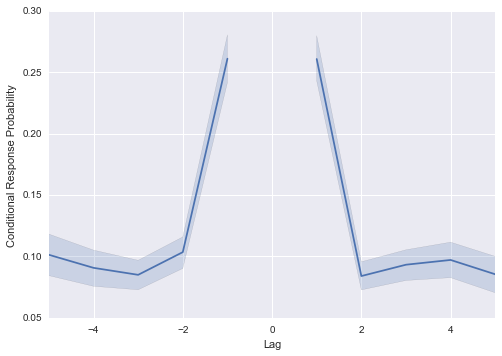

In [9]:
ax = sns.tsplot(data=lag_crp, estimator=np.nanmean, time = np.arange(11)-5)
ax.set(xlabel='Lag',ylabel='Conditional Response Probability')

In [10]:
import pybeh.pfr as pfr

In [11]:
p_first_recall = pfr.pfr(recalls=data['recalls'],
                  subjects=np.arange(len(data['subject'])),
                  listLength=12)

[<matplotlib.text.Text at 0x113de8650>, <matplotlib.text.Text at 0x10811fbd0>]

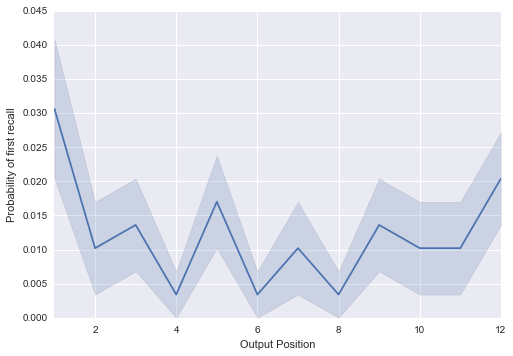

In [12]:
ax = sns.tsplot(data=p_first_recall, time = np.arange(12)+1)
ax.set(xlabel='Output Position',ylabel='Probability of first recall')